## Day 1 Customer Churn Prediction model

In [32]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [34]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [35]:
data.describe() # gives three columns only because only three contains numerical data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
data.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
data.isnull().sum() # this gives us the sum of missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Toal charges has 11 missing values

In [42]:
data_nonull=data.dropna() # this will drop the null values 

In [43]:
data_nonull.describe() # data with no null values

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [44]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [45]:
data_nonull.isnull().sum() # no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Encode the target variable

In [46]:
# The target variable is 'churn'
data_nonull['Churn']=data_nonull['Churn'].map({'Yes':1,'No':0})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22248\1868989253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nonull['Churn']=data_nonull['Churn'].map({'Yes':1,'No':0})


In [47]:
data_nonull.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### Encode the categorical variables

In [48]:
data_encoded=pd.get_dummies(data_nonull.drop(['customerID'],axis=1),drop_first=True) # convert all categorical variables into one hot encoding

In [49]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [50]:
data_encoded=data_encoded.astype(int) 
# Converts True -> 1
#          False -> 0

In [51]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Train Test Split

In [52]:
x=data_encoded.drop(['Churn'],axis=1)
y=data_encoded['Churn']
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [53]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Time to make a model (Random Forest) 

# Class Weights

In [55]:
model=RandomForestClassifier(class_weight='balanced') # since the data is imbalanced hence class_weight=balanced is used
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



# SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm=SMOTE(random_state=42)
x_resample,y_resampled=sm.fit_resample(x_train,y_train)
model.fit(x_resample,y_resampled)
y_prediction=model.predict(x_test)

In [59]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



### Tuning the model using GridsearchCV

GridsearchCV train the model on the different hyperparameters and choose te best set of hyperparameters that give the best results

In [63]:
from sklearn.model_selection import GridSearchCV

In [75]:
paramgrid={
    'n_estimators':[100,200], # number of trees
    'max_depth':[None,10,20], # depth of tree
    'min_samples_split':[2,5], # how many samples to split a node
    'min_samples_leaf':[1,2] 
}
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=paramgrid,cv=3,scoring='f1',n_jobs=-1,verbose=2)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [80]:
print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [81]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
feature_importance=best_model.feature_importances_
features=x_test.columns

In [88]:
fi_df=pd.DataFrame({"Features":features,"Importance":feature_importance})
fi_df

,Features,Importance
0,SeniorCitizen,0.016659
1,tenure,0.179151
2,MonthlyCharges,0.095568
3,TotalCharges,0.167523
4,gender_Male,0.016140
5,Partner_Yes,0.016156
6,Dependents_Yes,0.015107
7,PhoneService_Yes,0.004554
8,MultipleLines_No phone service,0.004629
9,MultipleLines_Yes,0.015208


In [89]:
fi_df=fi_df.sort_values('Importance',ascending=False).head(10)
fi_df

,Features,Importance
1,tenure,0.179151
3,TotalCharges,0.167523
2,MonthlyCharges,0.095568
10,InternetService_Fiber optic,0.080278
25,Contract_Two year,0.066206
28,PaymentMethod_Electronic check,0.054687
24,Contract_One year,0.038791
13,OnlineSecurity_Yes,0.032613
19,TechSupport_Yes,0.031852
26,PaperlessBilling_Yes,0.020703


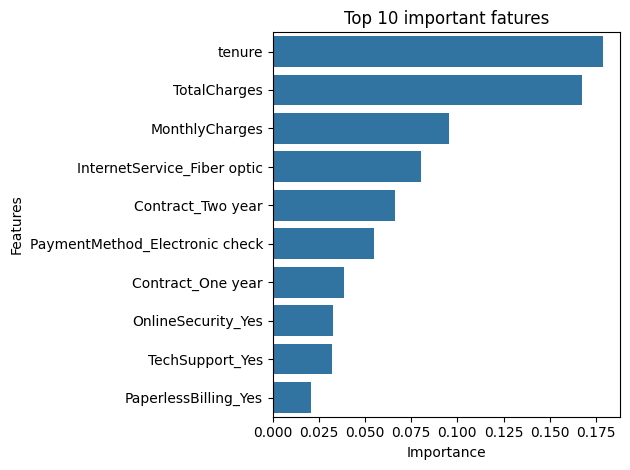

In [94]:
plt.Figure(figsize=(10,6))
sns.barplot(fi_df,x='Importance',y='Features')
plt.title("Top 10 important fatures")
plt.tight_layout()
plt.show()

In [95]:
import joblib
joblib.dump(best_model,'churn_model_tuned.pkl')

['churn_model_tuned.pkl']

In [98]:
x_test.to_csv("Test_Data.csv",index=False)

In [99]:
x_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1,61,25,1501,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
6784,0,19,24,465,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6125,0,13,102,1359,1,1,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
3052,0,37,55,2030,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4099,0,6,29,161,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
